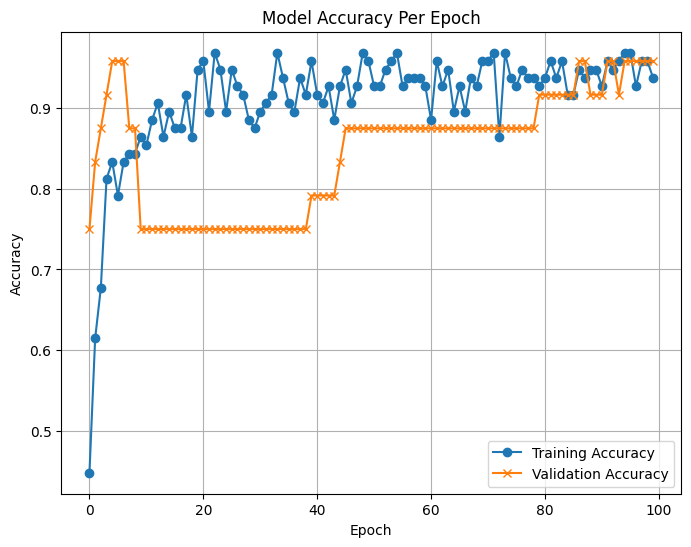

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.9171 - loss: 0.1670 - val_accuracy: 0.9583 - val_loss: 0.1145 - learning_rate: 5.0000e-04
Evaluating the model on the test set...
Test Loss: 0.0608
Test Accuracy: 0.9667


In [2]:
# 安裝所需套件
!pip install tensorflow matplotlib -q

# 匯入必要的庫
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output

# 加載 Iris 數據集
print("Loading the Iris dataset...")
data = load_iris()
X, y = data.data, data.target
print(f"Features shape: {X.shape}, Target shape: {y.shape}")

# 資料標準化
print("Normalizing data...")
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 資料分割 (80% 訓練, 20% 測試)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set shape: {X_train.shape}, Testing set shape: {X_test.shape}")

# 建立 Keras 模型
print("Building the Keras model...")
model = Sequential([
    Dense(128, activation='relu', input_shape=(4,)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(3, activation='softmax')  # 3個分類對應 Iris 品種
])

# 編譯模型
print("Compiling the model...")
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 自定義回調函數：實時顯示準確率圖表
class PlotLearning(tf.keras.callbacks.Callback):
    def __init__(self):
        self.epochs = []
        self.acc = []
        self.val_acc = []

    def on_epoch_end(self, epoch, logs=None):
        # 紀錄數據
        self.epochs.append(epoch)
        self.acc.append(logs["accuracy"])
        self.val_acc.append(logs["val_accuracy"])

        # 即時繪圖
        clear_output(wait=True)
        plt.figure(figsize=(8, 6))
        plt.plot(self.epochs, self.acc, label='Training Accuracy', marker='o')
        plt.plot(self.epochs, self.val_acc, label='Validation Accuracy', marker='x')
        plt.title('Model Accuracy Per Epoch')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.grid(True)
        plt.show()

# 定義回調函數
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)
plot_learning = PlotLearning()

# 訓練模型
print("Training the model...")
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=16,
    callbacks=[early_stopping, reduce_lr, plot_learning],
    verbose=1
)

# 測試模型
print("Evaluating the model on the test set...")
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

